In [7]:
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape

import numpy as np
import pandas

np.random.seed(10)


2.19.0


In [8]:
data = pandas.read_csv('colors.csv')
data.head()

,name,red,green,blue
0,parakeet,174,182,87
1,saddle brown,88,52,1
2,cucumber crush,222,237,215
3,pool blue,134,194,201
4,distance,98,110,130


In [13]:
names = data["name"]

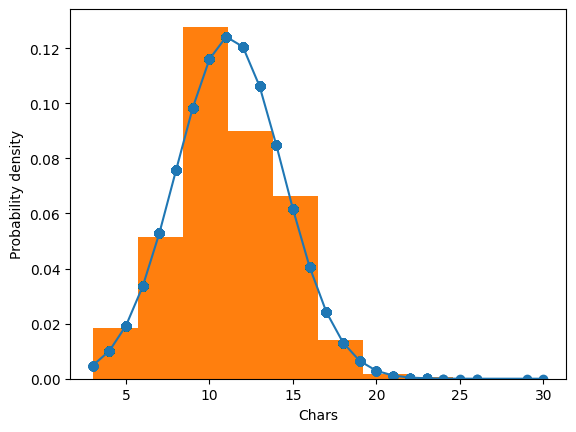

In [16]:
import scipy.stats as stats
import matplotlib.pyplot as plt

h = sorted(names.str.len())

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  # Fit a normal distribution
plt.plot(h, fit, '-o')

plt.hist(h, density=True)  # Updated from `normed=True`
plt.xlabel('Chars')
plt.ylabel('Probability density')
plt.show()


In [17]:
np.array(h).max()

np.int64(30)

In [19]:
maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)

In [20]:
from keras.utils import to_categorical

one_hot_names = to_categorical(padded_names)
num_classes = one_hot_names.shape[-1]
num_classes


28

In [21]:
t.word_index

{'e': 1,
 'a': 2,
 'r': 3,
 ' ': 4,
 'i': 5,
 'n': 6,
 'l': 7,
 'o': 8,
 't': 9,
 's': 10,
 'c': 11,
 'u': 12,
 'd': 13,
 'g': 14,
 'p': 15,
 'h': 16,
 'm': 17,
 'b': 18,
 'y': 19,
 'w': 20,
 'k': 21,
 'f': 22,
 'v': 23,
 'z': 24,
 'q': 25,
 'j': 26,
 'x': 27}

In [25]:
# The RGB values are between 0 - 255
# scale them to be between 0 - 1
def norm(value):
    return value / 255.0

normalized_values = np.column_stack([norm(data["red"]), norm(data["green"]), norm(data["blue"])])


In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.models import load_model

model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, num_classes)))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

C:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 25, 256)             │         291,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 505,859 (1.93 MB)

 Trainable params: 505,859 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(
    one_hot_names, normalized_values,
    epochs=40,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 58s 116ms/step - accuracy: 0.6041 - loss: 0.0634 - val_accuracy: 0.6624 - val_loss: 0.0595
Epoch 2/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 45s 113ms/step - accuracy: 0.6664 - loss: 0.0554 - val_accuracy: 0.6660 - val_loss: 0.0555
Epoch 3/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 46s 115ms/step - accuracy: 0.6745 - loss: 0.0521 - val_accuracy: 0.6787 - val_loss: 0.0531
Epoch 4/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 88s 129ms/step - accuracy: 0.6841 - loss: 0.0497 - val_accuracy: 0.6857 - val_loss: 0.0514
Epoch 5/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 46s 115ms/step - accuracy: 0.6633 - loss: 0.0477 - val_accuracy: 0.6864 - val_loss: 0.0515
Epoch 6/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 49s 123ms/step - accuracy: 0.6722 - loss: 0.0448 - val_accuracy: 0.6822 - val_loss: 0.0478
Epoch 7/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 51s 129ms/step - accuracy: 0.6830 - loss: 0.0430 - val_accuracy: 0.6660 - val_loss: 0.0469
Epoch 8/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 42s 106ms/step - accuracy: 0.6901 - loss: 0

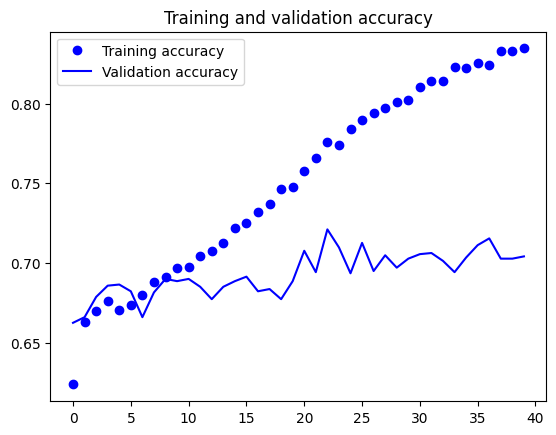

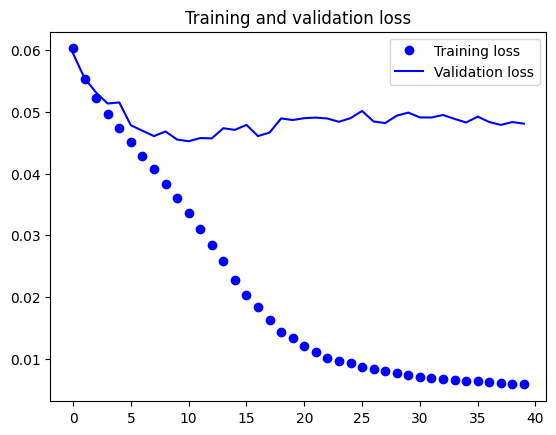

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot Accuracy
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot Loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [30]:
# Plot a color image.
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

In [31]:
def scale(n):
    return int(n * 255) 

In [34]:
def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
    one_hot = to_categorical(padded, num_classes=num_classes)
    pred = model.predict(np.array(one_hot))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
light blue, R,G,B: 197 215 238


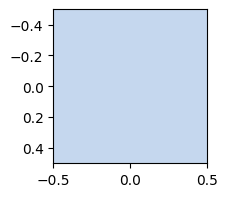

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
blue, R,G,B: 7 34 199


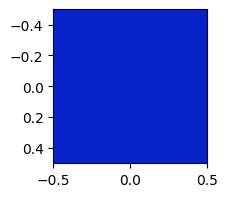

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
dark blue, R,G,B: 13 13 127


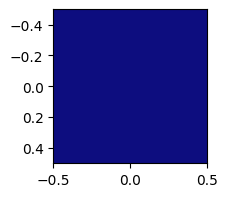

In [35]:
predict("light blue")
predict("blue")
predict("dark blue")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
black, R,G,B: 29 23 28


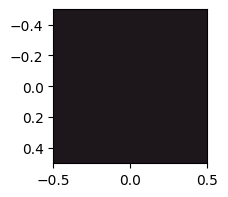

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
white, R,G,B: 242 239 232


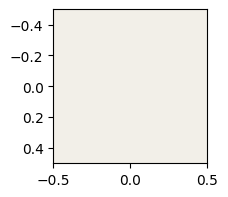

In [36]:
predict("black")
predict("white")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
tensorflow orange, R,G,B: 247 152 63


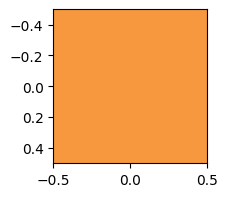

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
forest, R,G,B: 43 75 61


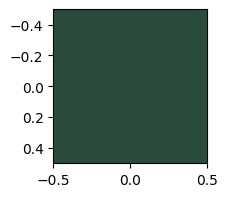

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
evergreen, R,G,B: 5 54 46


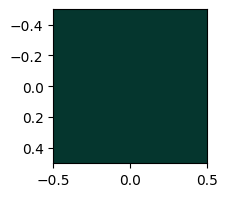

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
tangerine, R,G,B: 248 133 23


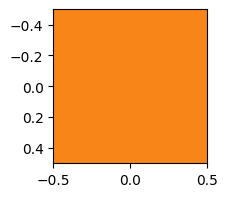

In [37]:
predict("tensorflow orange")
predict("forest")
predict("evergreen")
predict("tangerine")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
princess ivory, R,G,B: 249 243 234


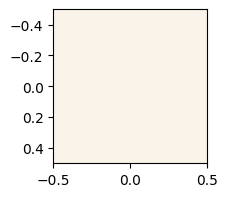

In [38]:
predict("princess ivory")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
bull cream, R,G,B: 218 226 202


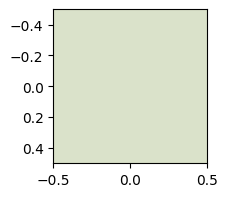

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
keras red, R,G,B: 205 37 37


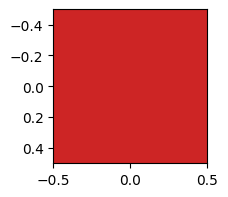

In [39]:
predict("bull cream")
predict("keras red")